In [42]:
import pandas as pd

In [43]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], dtype=int)
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,1,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,0,0,1,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,1,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,0,0,0,1,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,...,0,0,0,0,1,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,0,1,...,0,0,0,0,1,0,0,1,0,0
301,57,1,130,131,0,115,1,1.2,0,1,...,0,0,0,0,1,0,1,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [47]:
from sklearn.preprocessing import StandardScaler
import pickle

standard = StandardScaler()
x_train[['age', 'trestbps', 'chol', 'thalach']] = standard.fit_transform(x_train[['age', 'trestbps', 'chol', 'thalach']])
x_test[['age', 'trestbps', 'chol', 'thalach']] = standard.transform(x_test[['age', 'trestbps', 'chol', 'thalach']])

with open("scaler.pkl", "wb") as file:
    pickle.dump(standard, file)

x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
74,-1.252208,0,-0.573384,-0.666691,0,0.613514,0,0.2,0,0,...,0,0,0,1,0,1,0,0,0,0
20,0.513166,1,0.161956,-0.211320,0,0.436555,0,0.5,1,0,...,0,0,0,0,1,1,0,0,0,0
162,-1.472879,1,-0.686514,-1.881013,0,1.365590,0,0.0,0,1,...,1,0,0,1,0,1,0,0,0,0
183,0.402830,1,-1.139031,-0.298057,0,0.613514,0,2.5,0,0,...,0,0,0,0,1,0,1,0,0,0
139,1.064845,1,-0.233996,0.417526,0,-2.040873,1,0.2,1,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.623501,1,0.444780,1.068056,0,0.834713,0,1.2,1,0,...,0,0,0,0,1,0,0,1,0,0
63,-1.472879,1,0.161956,-0.883534,0,-0.846399,0,0.0,0,1,...,0,0,1,0,0,1,0,0,0,0
256,0.402830,1,-0.233996,0.330788,0,-0.934878,1,3.0,1,0,...,0,0,0,0,1,0,0,1,0,0
98,-1.252208,1,-0.120867,1.545111,0,0.480795,0,1.9,0,0,...,1,0,0,1,0,0,1,0,0,0


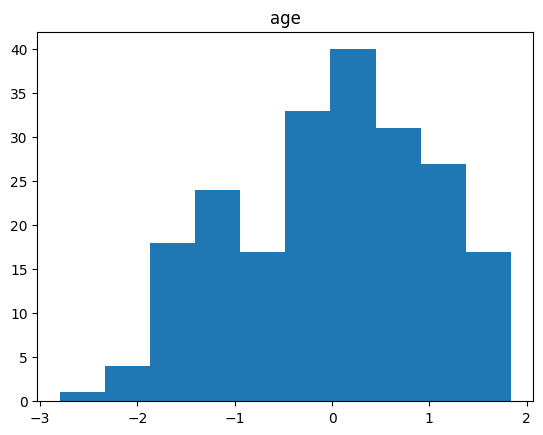

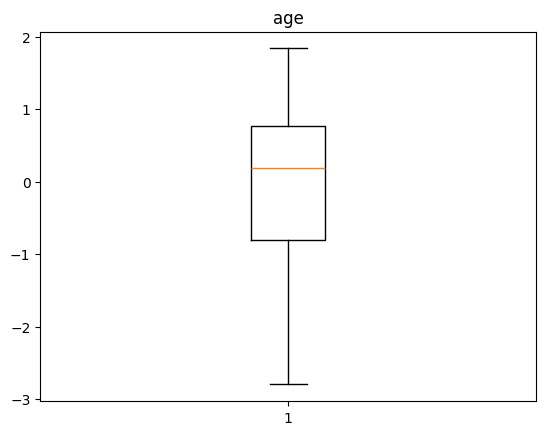

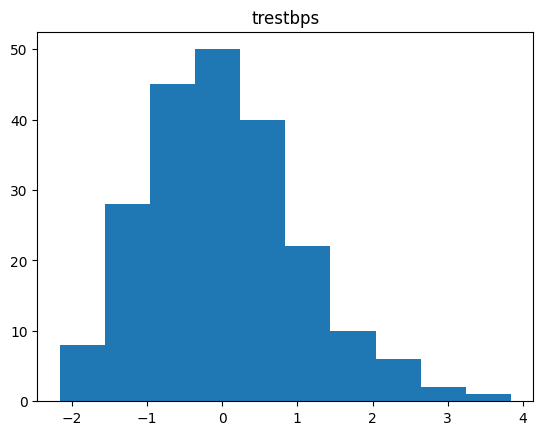

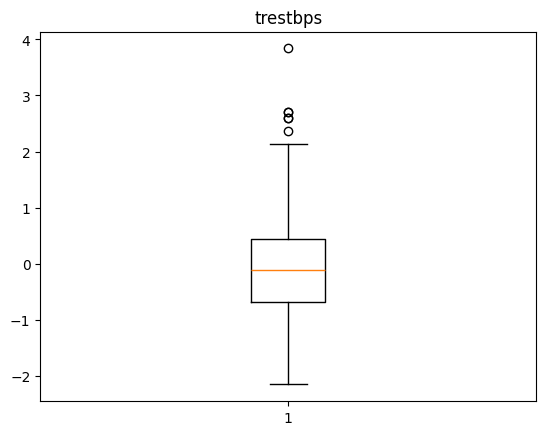

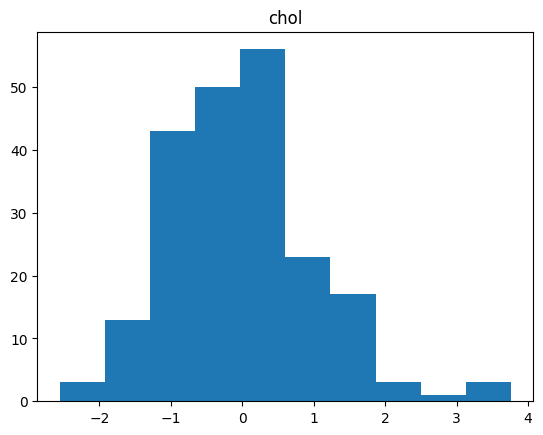

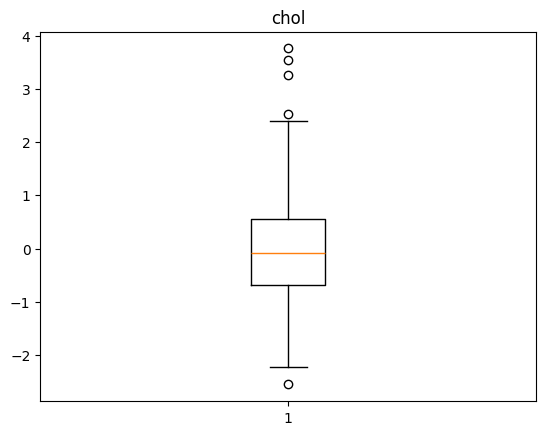

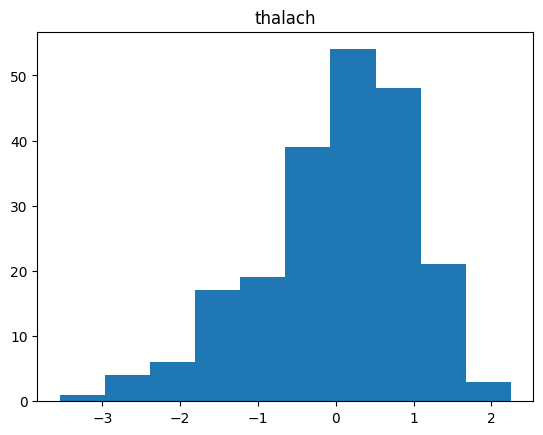

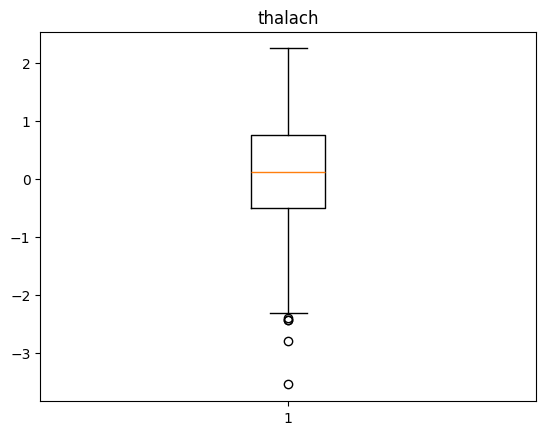

In [48]:
import matplotlib.pyplot as plt

num_variables = ['age', 'trestbps', "chol", "thalach"]
for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()

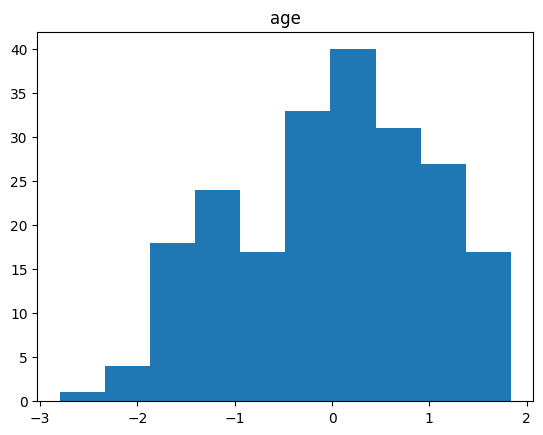

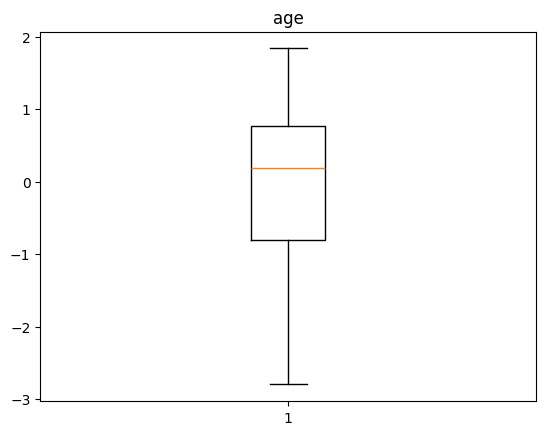

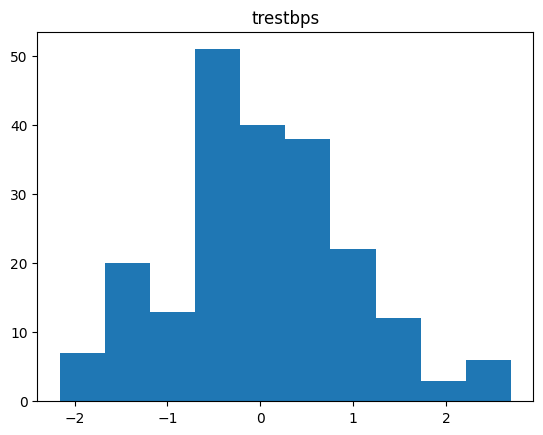

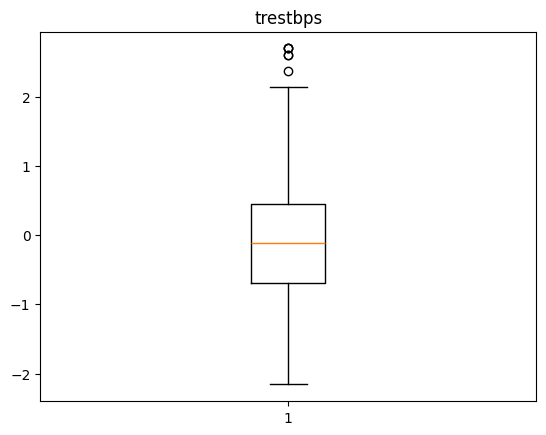

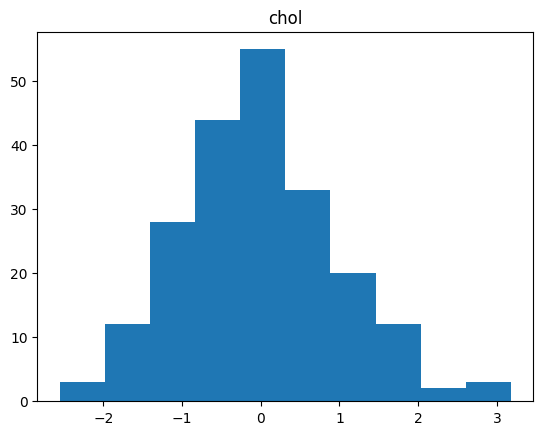

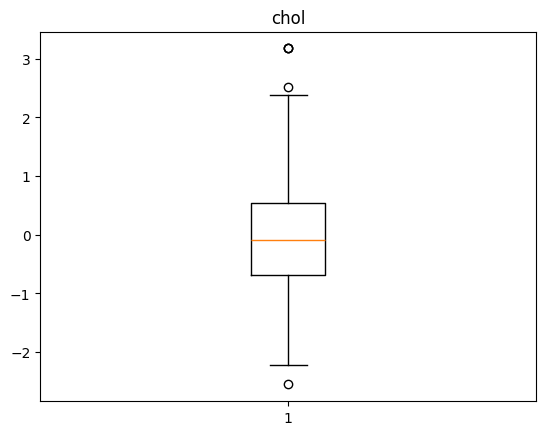

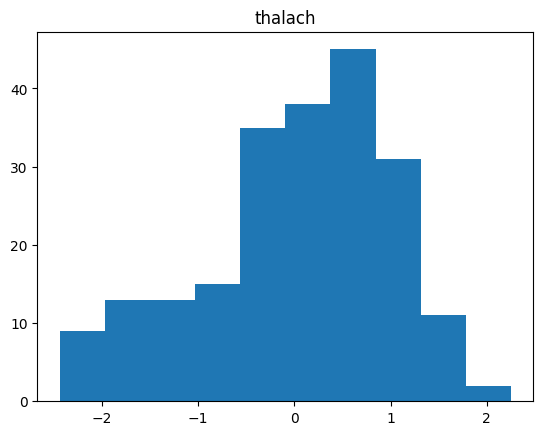

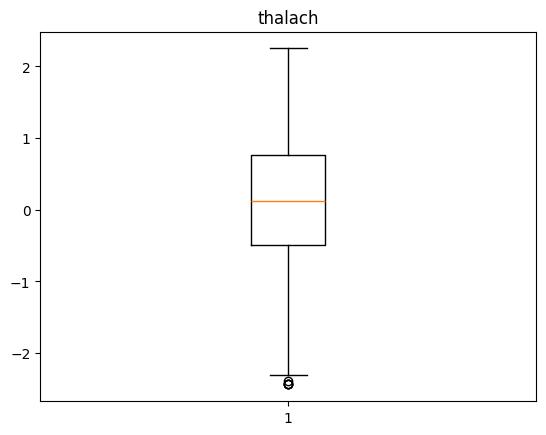

In [49]:
import numpy as np

x_train['trestbps'] = np.where(x_train['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_train['trestbps'])
x_test['trestbps'] = np.where(x_test['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_test['trestbps'])

x_train['chol'] = np.where(x_train['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_train['chol'])
x_test['chol'] = np.where(x_test['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_test['chol'])

x_train['thalach'] = np.where(x_train['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_train['thalach'])
x_test['thalach'] = np.where(x_test['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_test['thalach'])

for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()


<Axes: >

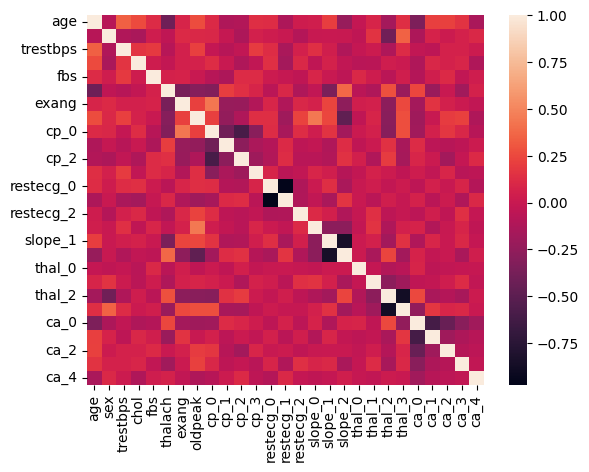

In [50]:
import seaborn as sns

sns.heatmap(x_train.corr())

In [51]:
x_train[['age', 'trestbps', 'chol', 'thalach']].describe()

,age,trestbps,chol,thalach
count,2.120000e+02,212.000000,212.000000,212.000000
mean,2.010970e-16,-0.005512,-0.004830,0.006886
std,1.002367e+00,0.984203,0.985714,0.982115
min,-2.796909e+00,-2.157196,-2.553228,-2.439031
25%,-8.108642e-01,-0.686514,-0.688375,-0.492481
50%,1.821582e-01,-0.120867,-0.081214,0.126876
75%,7.614213e-01,0.444780,0.547632,0.757293
max,1.837196e+00,2.694923,3.177073,2.250386


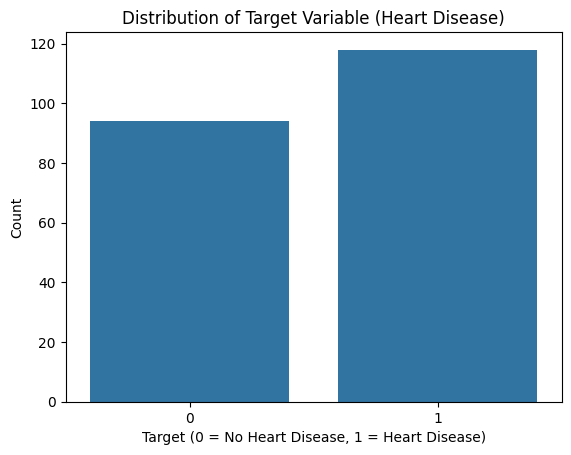

In [52]:
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

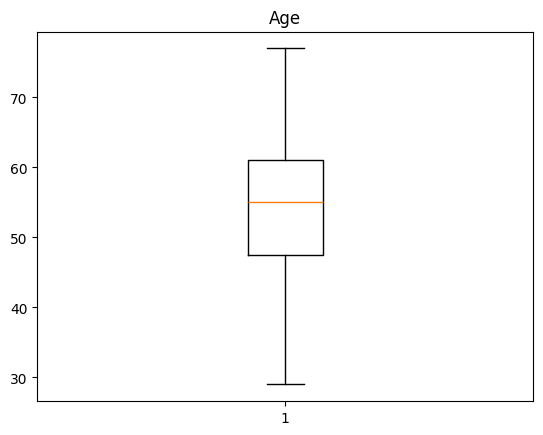

In [53]:
plt.boxplot(data['age'])
plt.title('Age')
plt.show()

In [54]:
x_train['age_range'] = pd.cut(data.loc[x_train.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
x_test['age_range'] = pd.cut(data.loc[x_test.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

x_train['age_chol'] = x_train['age'] * x_train['chol']
x_test['age_chol'] = x_test['age'] * x_test['chol']

x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,age_range,age_chol
74,-1.252208,0,-0.573384,-0.666691,0,0.613514,0,0.2,0,0,...,0,1,0,1,0,0,0,0,40-50,0.834835
20,0.513166,1,0.161956,-0.211320,0,0.436555,0,0.5,1,0,...,0,0,1,1,0,0,0,0,50-60,-0.108442
162,-1.472879,1,-0.686514,-1.881013,0,1.365590,0,0.0,0,1,...,0,1,0,1,0,0,0,0,40-50,2.770505
183,0.402830,1,-1.139031,-0.298057,0,0.613514,0,2.5,0,0,...,0,0,1,0,1,0,0,0,50-60,-0.120066
139,1.064845,1,-0.233996,0.417526,0,-2.040873,1,0.2,1,0,...,0,0,1,0,1,0,0,0,60-70,0.444600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.623501,1,0.444780,1.068056,0,0.834713,0,1.2,1,0,...,0,0,1,0,0,1,0,0,50-60,0.665934
63,-1.472879,1,0.161956,-0.883534,0,-0.846399,0,0.0,0,1,...,1,0,0,1,0,0,0,0,40-50,1.301339
256,0.402830,1,-0.233996,0.330788,0,-0.934878,1,3.0,1,0,...,0,0,1,0,0,1,0,0,50-60,0.133251
98,-1.252208,1,-0.120867,1.545111,0,0.480795,0,1.9,0,0,...,0,1,0,0,1,0,0,0,40-50,-1.934799


In [55]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

x_train['age_range'] = label.fit_transform(x_train['age_range'])
x_test['age_range'] = label.transform(x_test['age_range'])


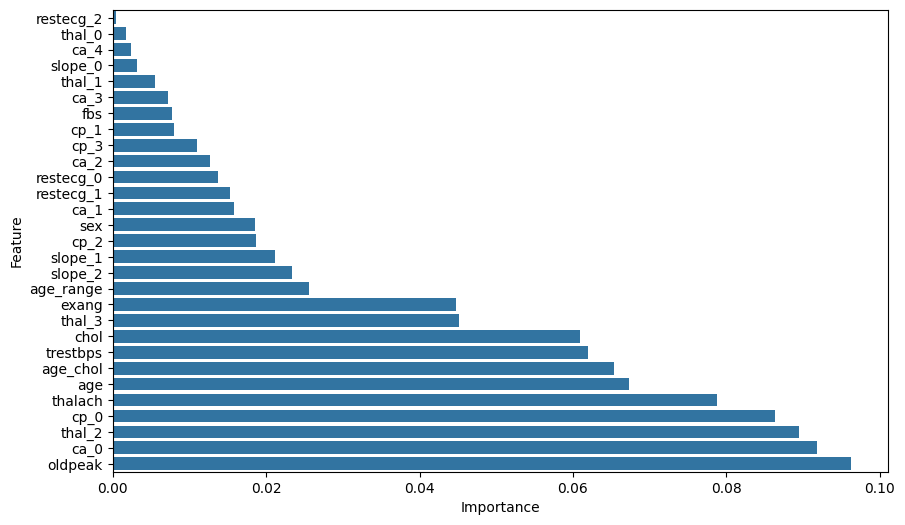

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.show()

In [57]:
threshold = 0.03

important_features = importance[importance['Importance'] > threshold]['Feature'].tolist()

x_train = x_train[important_features]
x_test = x_test[important_features]

print("Selected features:", important_features)

with open("features.pkl", "wb") as f:
    pickle.dump(important_features, f)

x_train

Selected features: ['exang', 'thal_3', 'chol', 'trestbps', 'age_chol', 'age', 'thalach', 'cp_0', 'thal_2', 'ca_0', 'oldpeak']


,exang,thal_3,chol,trestbps,age_chol,age,thalach,cp_0,thal_2,ca_0,oldpeak
74,0,0,-0.666691,-0.573384,0.834835,-1.252208,0.613514,0,1,1,0.2
20,0,1,-0.211320,0.161956,-0.108442,0.513166,0.436555,1,0,1,0.5
162,0,0,-1.881013,-0.686514,2.770505,-1.472879,1.365590,0,1,1,0.0
183,0,1,-0.298057,-1.139031,-0.120066,0.402830,0.613514,0,0,0,2.5
139,1,1,0.417526,-0.233996,0.444600,1.064845,-2.040873,1,0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...
237,0,1,1.068056,0.444780,0.665934,0.623501,0.834713,1,0,0,1.2
63,0,0,-0.883534,0.161956,1.301339,-1.472879,-0.846399,0,0,1,0.0
256,1,1,0.330788,-0.233996,0.133251,0.402830,-0.934878,1,0,0,3.0
98,0,0,1.545111,-0.120867,-1.934799,-1.252208,0.480795,0,1,0,1.9


Logistic Regression Results:
Accuracy: 0.8901098901098901
Precision: 0.8627450980392157
Recall: 0.9361702127659575
F1 Score: 0.8979591836734694
AUC Score: 0.9434235976789167
K-fold cross vaditation accuracy: [0.79069767 0.76744186 0.78571429 0.83333333 0.85714286]
K-fold cross vaditation mean accuracy: 0.8068660022148395


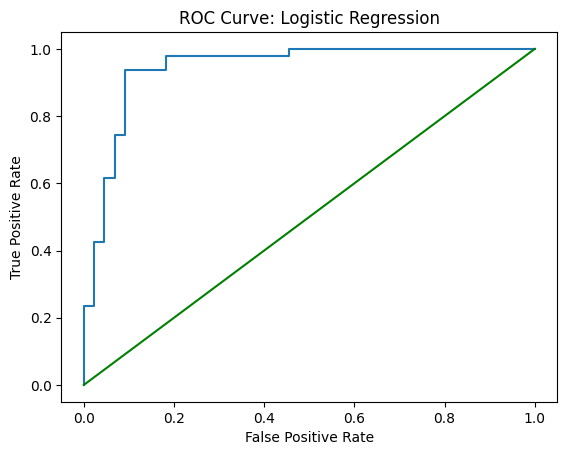

Decision Tree Classifier Results:
Accuracy: 0.7582417582417582
Precision: 0.7659574468085106
Recall: 0.7659574468085106
F1 Score: 0.7659574468085106
AUC Score: 0.7579787234042553
K-fold cross vaditation accuracy: [0.72093023 0.69767442 0.71428571 0.61904762 0.64285714]
K-fold cross vaditation mean accuracy: 0.6789590254706533


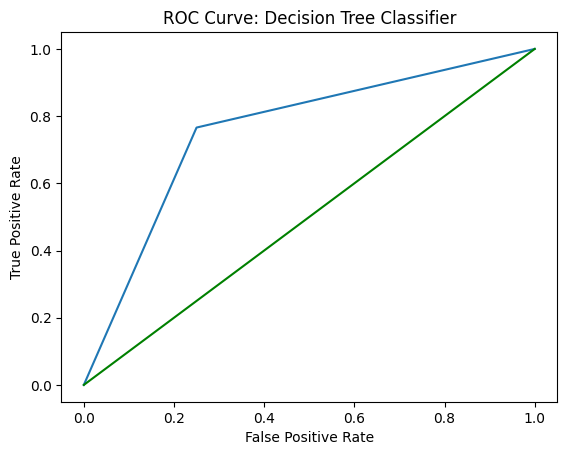

Random Forest Classifier Results:
Accuracy: 0.8461538461538461
Precision: 0.8367346938775511
Recall: 0.8723404255319149
F1 Score: 0.8541666666666666
AUC Score: 0.9308510638297872
K-fold cross vaditation accuracy: [0.76744186 0.74418605 0.78571429 0.80952381 0.78571429]
K-fold cross vaditation mean accuracy: 0.778516057585825


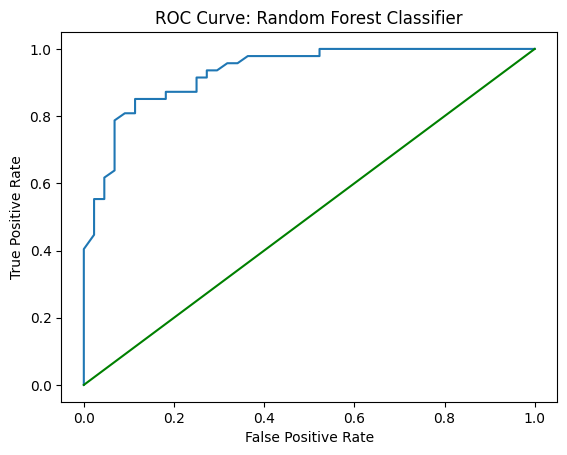

SVC Results:
Accuracy: 0.8681318681318682
Precision: 0.8301886792452831
Recall: 0.9361702127659575
F1 Score: 0.88
AUC Score: 0.9272243713733076
K-fold cross vaditation accuracy: [0.72093023 0.79069767 0.78571429 0.83333333 0.76190476]
K-fold cross vaditation mean accuracy: 0.778516057585825


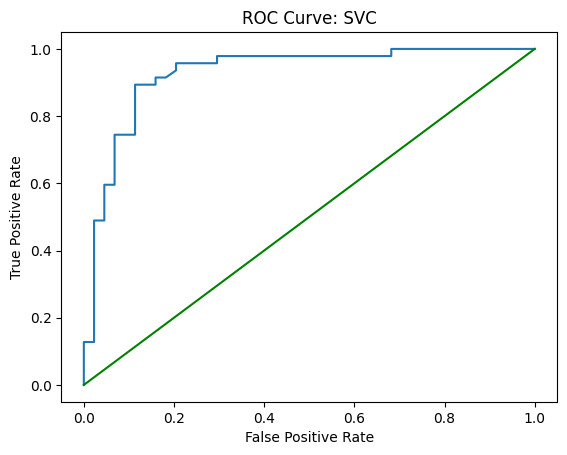

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_model_predict = lr_model.predict(x_test)
lr_model_probs = lr_model.predict_proba(x_test)[:, 1]
lr_cross_valid = cross_val_score(lr_model, x_train, y_train, cv=5)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_model_predict):}")
print(f"Precision: {precision_score(y_test, lr_model_predict):}")
print(f"Recall: {recall_score(y_test, lr_model_predict):}")
print(f"F1 Score: {f1_score(y_test, lr_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, lr_model_probs)}")
print(f"K-fold cross vaditation accuracy: {lr_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {lr_cross_valid.mean()}")

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model_probs)
plt.plot(lr_fpr, lr_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
dtc_model_predict = dtc_model.predict(x_test)
dtc_model_probs = dtc_model.predict_proba(x_test)[:, 1]
dtc_cross_valid = cross_val_score(dtc_model, x_train, y_train, cv=5)

print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, dtc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {dtc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {dtc_cross_valid.mean()}")

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_model_probs)
plt.plot(dtc_fpr, dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_model_predict = rfc_model.predict(x_test)
rfc_model_probs = rfc_model.predict_proba(x_test)[:, 1]
rfc_cross_valid = cross_val_score(rfc_model, x_train, y_train, cv=5)

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, rfc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {rfc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {rfc_cross_valid.mean()}")

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_model_probs)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


svc_model = SVC(probability=True)
svc_model.fit(x_train, y_train)
svc_model_predict = svc_model.predict(x_test)
svc_model_probs = svc_model.predict_proba(x_test)[:, 1]
svc_cross_valid = cross_val_score(svc_model, x_train, y_train, cv=5)

print("SVC Results:")
print(f"Accuracy: {accuracy_score(y_test, svc_model_predict):}")
print(f"Precision: {precision_score(y_test, svc_model_predict):}")
print(f"Recall: {recall_score(y_test, svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, svc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {svc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {svc_cross_valid.mean()}")

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_model_probs)
plt.plot(svc_fpr, svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Logistic Regression with Hyperparameters Results:
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9230769230769231
Precision: 0.9166666666666666
Recall: 0.9361702127659575
F1 Score: 0.9263157894736842
AUC Score: 0.9443907156673114
K-fold cross validation accuracy: [0.79069767 0.79069767 0.78571429 0.83333333 0.85714286]
K-fold cross validation mean accuracy: 0.8115171650055372


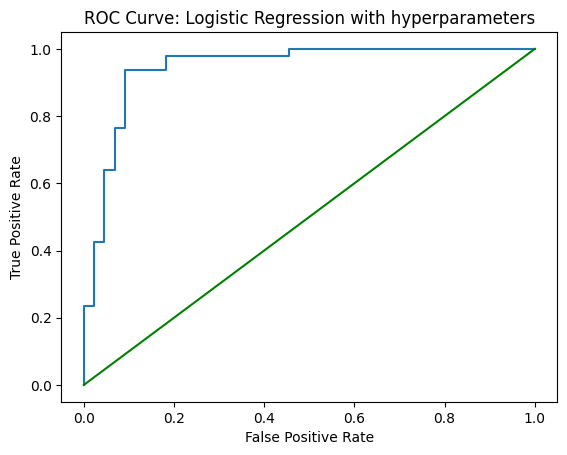

Decision Tree Classifier with Hyperparameters Results:
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.7692307692307693
Precision: 0.8421052631578947
Recall: 0.6808510638297872
F1 Score: 0.7529411764705882
AUC Score: 0.8691972920696325
K-fold cross validation accuracy: [0.72093023 0.62790698 0.69047619 0.80952381 0.66666667]
K-fold cross validation mean accuracy: 0.7031007751937983


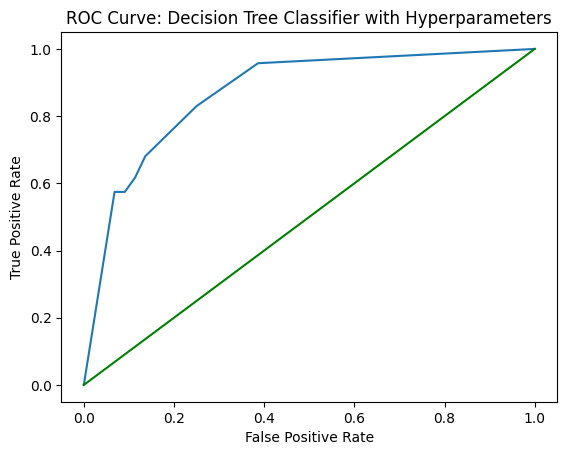

Random Forest Classifier with Hyperparameters Results:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8461538461538461
Precision: 0.8367346938775511
Recall: 0.8723404255319149
F1 Score: 0.8541666666666666
AUC Score: 0.9443907156673114
K-fold cross validation accuracy: [0.69767442 0.79069767 0.78571429 0.83333333 0.83333333]
K-fold cross validation mean accuracy: 0.7881506090808417


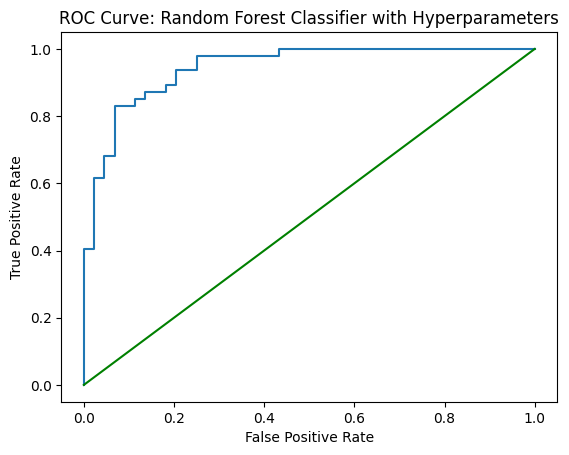

SVC with Hyperparameters Results:
Best Parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9010989010989011
Precision: 0.8653846153846154
Recall: 0.9574468085106383
F1 Score: 0.9090909090909091
AUC Score: 0.940522243713733
K-fold cross validation accuracy: [0.79069767 0.79069767 0.78571429 0.80952381 0.85714286]
K-fold cross validation mean accuracy: 0.8067552602436322


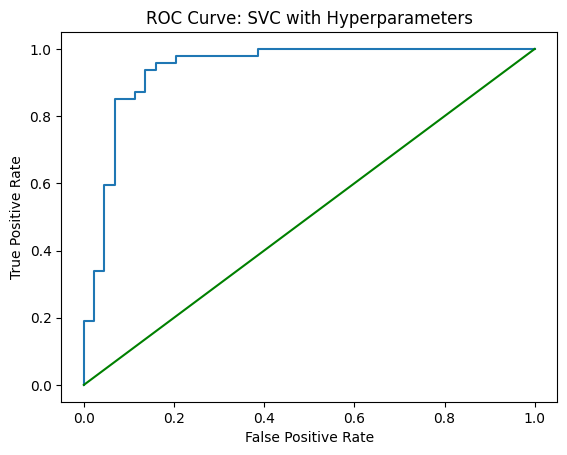

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],      
    'max_iter': [500, 1000],
    'class_weight': ['balanced']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(x_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

print("Logistic Regression with Hyperparameters Results:")
print("Best Parameters:", grid_search_lr.best_params_)

best_lr_model_predict = best_model_lr.predict(x_test)
best_lr_model_probs = best_model_lr.predict_proba(x_test)[:, 1]
best_lr_cross_valid = cross_val_score(best_model_lr, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_lr_model_predict):}")
print(f"Precision: {precision_score(y_test, best_lr_model_predict):}")
print(f"Recall: {recall_score(y_test, best_lr_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_lr_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_lr_model_probs)}")
print(f"K-fold cross validation accuracy: {best_lr_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_lr_cross_valid.mean()}")

best_lr_fpr, best_lr_tpr, _ = roc_curve(y_test, best_lr_model_probs)
plt.plot(best_lr_fpr, best_lr_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression with hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_dtc = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5, scoring='roc_auc')
grid_search_dtc.fit(x_train, y_train)
best_model_dtc = grid_search_dtc.best_estimator_

print("Decision Tree Classifier with Hyperparameters Results:")
print("Best Parameters:", grid_search_dtc.best_params_)

best_dtc_model_predict = best_model_dtc.predict(x_test)
best_dtc_model_probs = best_model_dtc.predict_proba(x_test)[:, 1]
best_dtc_cross_valid = cross_val_score(best_model_dtc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, best_dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, best_dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_dtc_model_probs)}")
print(f"K-fold cross validation accuracy: {best_dtc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_dtc_cross_valid.mean()}")

best_dtc_fpr, best_dtc_tpr, _ = roc_curve(y_test, best_dtc_model_probs)
plt.plot(best_dtc_fpr, best_dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier with Hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5, scoring='roc_auc')
grid_search_rfc.fit(x_train, y_train)
best_model_rfc = grid_search_rfc.best_estimator_

print("Random Forest Classifier with Hyperparameters Results:")
print("Best Parameters:", grid_search_rfc.best_params_)

best_rfc_model_predict = best_model_rfc.predict(x_test)
best_rfc_model_probs = best_model_rfc.predict_proba(x_test)[:, 1]
best_rfc_cross_valid = cross_val_score(best_model_rfc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, best_rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, best_rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_rfc_model_probs)}")
print(f"K-fold cross validation accuracy: {best_rfc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_rfc_cross_valid.mean()}")

best_rfc_fpr, best_rfc_tpr, _ = roc_curve(y_test, best_rfc_model_probs)
plt.plot(best_rfc_fpr, best_rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier with Hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='roc_auc')
grid_search_svc.fit(x_train, y_train)
best_model_svc = grid_search_svc.best_estimator_

print("SVC with Hyperparameters Results:")
print("Best Parameters:", grid_search_svc.best_params_)

best_svc_model_predict = best_model_svc.predict(x_test)
best_svc_model_probs = best_model_svc.predict_proba(x_test)[:, 1]
best_svc_cross_valid = cross_val_score(best_model_svc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_svc_model_predict):}")
print(f"Precision: {precision_score(y_test, best_svc_model_predict):}")
print(f"Recall: {recall_score(y_test, best_svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_svc_model_probs)}")
print(f"K-fold cross validation accuracy: {best_svc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_svc_cross_valid.mean()}")

best_svc_fpr, best_svc_tpr, _ = roc_curve(y_test, best_svc_model_probs)
plt.plot(best_svc_fpr, best_svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC with Hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [60]:
choose_model = [
    ("Logistic Regression", f1_score(y_test, lr_model_predict), roc_auc_score(y_test, lr_model_probs)),
    ("Logistic Regression with Hyperparameters", f1_score(y_test, best_lr_model_predict), roc_auc_score(y_test, best_lr_model_probs)),
    ("Decision Tree Classifier", f1_score(y_test, dtc_model_predict), roc_auc_score(y_test, dtc_model_probs)),
    ("Decision Tree Classifier with Hyperparameters", f1_score(y_test, best_dtc_model_predict), roc_auc_score(y_test, best_dtc_model_probs)),
    ("Random Forest Classifier", f1_score(y_test, rfc_model_predict), roc_auc_score(y_test, rfc_model_probs)),
    ("Random Forest Classifier with Hyperparameters", f1_score(y_test, best_rfc_model_predict), roc_auc_score(y_test, best_rfc_model_probs)),
    ("SVC", f1_score(y_test, svc_model_predict), roc_auc_score(y_test, svc_model_probs)),
    ("SVC with Hyperparameters", f1_score(y_test, best_svc_model_predict), roc_auc_score(y_test, best_svc_model_probs)),
]

choose_model.sort(key=lambda x: (x[1], x[2]), reverse=True)

best_model, best_f1, best_auc = choose_model[0]

print(f"Best Performing Model: {best_model}")

with open("model.pkl", "wb") as f:
    if best_model == "Logistic Regression":
        pickle.dump(lr_model, f)
    elif best_model == "Logistic Regression with Hyperparameters":
        pickle.dump(best_model_lr, f)
    elif best_model == "Decision Tree Classifier":
        pickle.dump(dtc_model, f)
    elif best_model == "Decision Tree Classifier with Hyperparameters":
        pickle.dump(best_model_dtc, f)
    elif best_model == "Random Forest Classifier":
        pickle.dump(rfc_model, f)
    elif best_model == "Random Forest Classifier with Hyperparameters":
        pickle.dump(best_model_rfc, f)
    elif best_model == "SVC":
        pickle.dump(svc_model, f)
    elif best_model == "SVC with Hyperparameters":
        pickle.dump(best_model_svc, f)


Best Performing Model: Logistic Regression with Hyperparameters
